## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72390 entries, 0 to 72389
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      72390 non-null  int64  
 1   id_       72390 non-null  int64  
 2   hrs1      72390 non-null  object 
 3   marital   72390 non-null  object 
 4   age       72390 non-null  object 
 5   educ      72390 non-null  object 
 6   sex       72390 non-null  object 
 7   race      72390 non-null  object 
 8   polviews  72390 non-null  object 
 9   happy     72390 non-null  object 
 10  satjob    72390 non-null  object 
 11  realinc   72390 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 6.6+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 64912 entries, 0 to 72389
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      64912 non-null  int64  
 1   id_       64912 non-null  int64  
 2   hrs1      38134 no

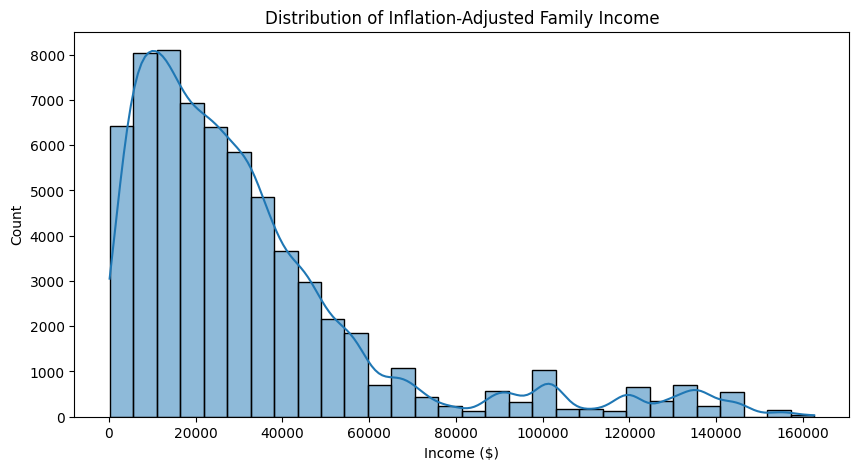

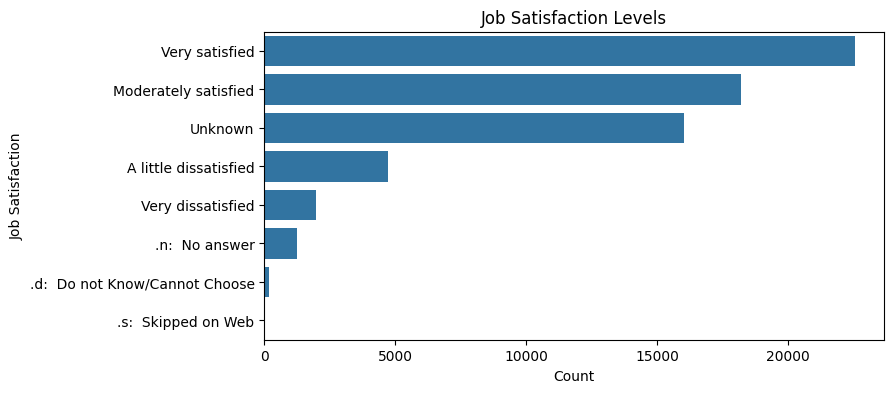

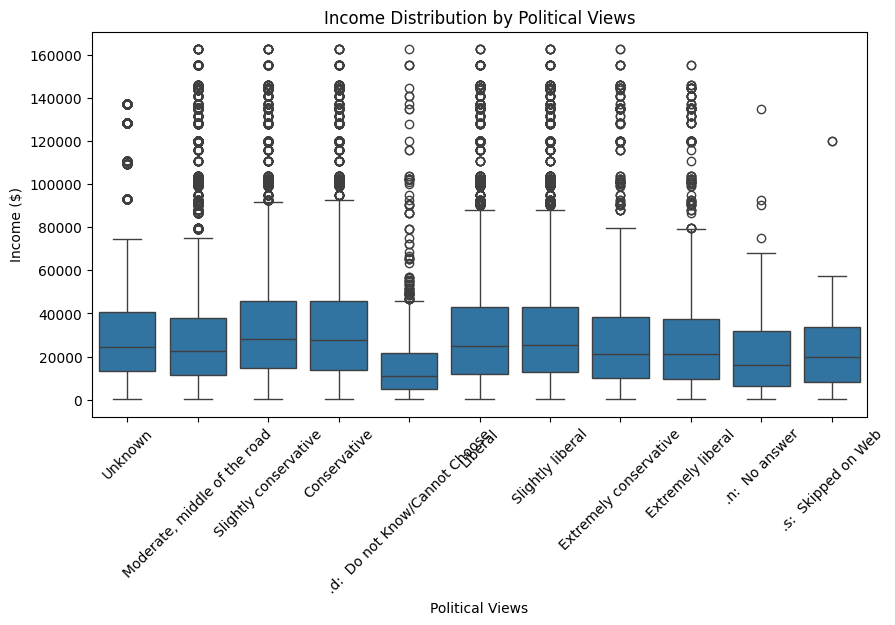

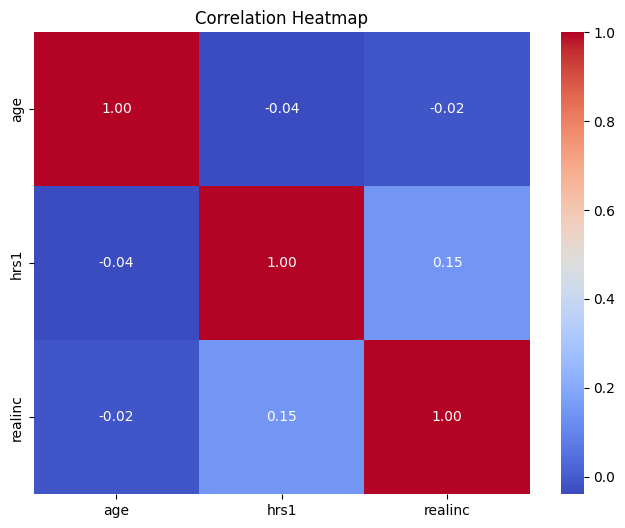

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("GSS.xlsx")

df.info()
df.head()

#Cleaning up the data from negative and incorrect data types

numeric_columns = ["age", "educ", "hrs1"]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

categorical_columns = ["sex", "race", "marital", "polviews", "happy", "satjob"]
for col in categorical_columns:
    df[col] = df[col].replace({".i: Inapplicable": None, ".i:  Inapplicable": None})

for col in categorical_columns:
    df[col] = df[col].fillna("Unknown")

df = df[df["realinc"] >= 0]

df = df.drop(columns=["educ"], errors='ignore')

#Cleaned up data
df.info()

df.describe()

for col in categorical_columns:
    print(f"\nUnique values in {col}:\n", df[col].value_counts())

#Numerical Summaries

# Distribution of income
plt.figure(figsize=(10,5))
sns.histplot(df['realinc'], bins=30, kde=True)
plt.title("Distribution of Inflation-Adjusted Family Income")
plt.xlabel("Income ($)")
plt.ylabel("Count")
plt.show()

# Distribution of job satisfaction
plt.figure(figsize=(8,4))
sns.countplot(y=df['satjob'], order=df['satjob'].value_counts().index)
plt.title("Job Satisfaction Levels")
plt.xlabel("Count")
plt.ylabel("Job Satisfaction")
plt.show()

# Income by Political Views
plt.figure(figsize=(10,5))
sns.boxplot(x=df['polviews'], y=df['realinc'])
plt.title("Income Distribution by Political Views")
plt.xlabel("Political Views")
plt.ylabel("Income ($)")
plt.xticks(rotation=45)
plt.show()

#Correlation Analysis

# Compute correlations
correlation_matrix = df[['age', 'hrs1', 'realinc']].corr()

# Display heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()